<h1><center>Darwin project-Group 34 </center></h1>

abstract:
1.	There are 13 features in the raw dataset, including the year and month of the outbreak, the state, the genus species of the bacteria, the contaminated ingredient, the food vehicle, and numbers of illnesses, deaths, and hospitalizations caused by the outbreak.
2.	We want to predict the number of illnesses that the foodborne outbreak may cause.
3.	We follow the Darwin supervised classification model thechnique.


## Import libraries

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

## Setup

**Login to Darwin**<br>


In [6]:
# Login

ds = DarwinSdk()

ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')

status, msg = ds.auth_login_user('ziqichina@outlook.com', 'PXkNucE5VZ')

if not status:
    print(msg)

## Data Upload and Clean

**Read dataset and view a file snippet**

In [4]:
df = pd.read_csv('export_train.csv')
df.head()

,year,month,illnesses,deaths,hospitalizations,state,genus_species,contaminated_ingredient,serotype_or_genotype,etiology_status,location_of_preparation,food_vehicle
0,2001,5,27,NaN,NaN,Florida,NaN,NaN,NaN,NaN,Restaurant - other or unknown type; School/col...,"poultry, unspecified"
1,2015,5,2,0.0,0.0,California,NaN,NaN,NaN,NaN,Restaurant - Sit-down dining,NaN
2,2014,11,6,0.0,0.0,Connecticut,Norovirus Genogroup II,NaN,other,Confirmed,Other (describe in remarks),NaN
3,2002,7,2,0.0,0.0,Alabama,NaN,NaN,NaN,NaN,Restaurant - other or unknown type,"ground beef, cheeseburger"
4,2005,2,3,0.0,0.0,Kansas,NaN,NaN,NaN,NaN,Private home/residence,"deli meat, sliced ham"


**Upload dataset to Darwin**

In [5]:
# Upload dataset
#ds.delete_all_datasets()
status, dataset = ds.upload_dataset('export_train.csv','outbreak_train')
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



**Clean dataset**<br>
we decide to set the max_unique_values to 200 for the raw dataset has too many different category of certain feature, for example, the genus_species and location_of_preparation are very diverse;<br>
And for the dataset has almost 20000 records and the limited amount of features we have, larger max_unique_values can avoid the model created drop too many features

In [5]:
ds.analyze_data('outbreak_train',max_unique_values=200)


(True,
 {'job_name': 'be1b23b6637a496bbce1fcb307b89cce',
  'artifact_name': 'f1434c25095e4ae09ff71fb896dfe03b'})

In [8]:
ds.download_artifact('f1434c25095e4ae09ff71fb896dfe03b')


(True,                    col_name num_uniques                  mean  \
 0                      year          18    2005.5480856405607   
 1                     month          12     6.444103493967501   
 2                 illnesses         289    19.400097635818398   
 3                    deaths          10  0.021155830753353973   
 4          hospitalizations          52    0.9329200034444157   
 5                     state          55                  None   
 6             genus_species         183                  None   
 7   contaminated_ingredient         291                  None   
 8      serotype_or_genotype         217                  None   
 9           etiology_status          19                  None   
 10  location_of_preparation         196                  None   
 11             food_vehicle        2419                  None   
 
                 stddev   min   max     col_type   missing  \
 0    5.153939341365022  1998  2015  IntegerType  0.000000   
 1   3.440

In [11]:
# clean dataset

target = 'illnesses'
status, job_id = ds.clean_data('outbreak_train', target = target, max_unique_values=200)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)


{'status': 'Taken', 'starttime': '2019-04-22T10:02:26.667498', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['outbreak_train'], 'artifact_names': ['de66c2d8540f4448a378431851f1ff56'], 'model_name': None, 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-22T10:02:26.667498', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['outbreak_train'], 'artifact_names': ['de66c2d8540f4448a378431851f1ff56'], 'model_name': None, 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T10:02:26.667498', 'endtime': '2019-04-22T10:02:48.756096', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['outbreak_train'], 'artifact_names': ['de66c2d8540f4448a378431851f1ff56'], 'model_name': None, 'job_error': ''}


## Create and Train Model 

In [15]:
model = 'illnesses' + "_model"
status, job_id = ds.create_model(dataset_names ='outbreak_train', \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-22T10:05:35.580147', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['outbreak_train'], 'artifact_names': None, 'model_name': 'illnesses_model', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-22T10:05:35.580147', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.6871739625930786, 'generations': 0, 'dataset_names': ['outbreak_train'], 'artifact_names': None, 'model_name': 'illnesses_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T10:05:35.580147', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.6871739625930786, 'generations': 0, 'dataset_names': ['outbreak_train'], 'artifact_names': None, 'model_name': 'illnesses_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-22T10:05:35.580147', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', 'loss': 0.6871

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [17]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model('illnesses_model')
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)


{'status': 'Running', 'starttime': '2019-04-22T10:10:17.139776', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': None, 'artifact_names': ['a1e3466e4c92421e9d2b9f5ac8a97276'], 'model_name': 'illnesses_model', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T10:10:17.139776', 'endtime': '2019-04-22T10:10:28.929602', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': None, 'artifact_names': ['a1e3466e4c92421e9d2b9f5ac8a97276'], 'model_name': 'illnesses_model', 'job_error': ''}


Show the 10 most important features of the model.

In [7]:
status, feature_importance = ds.download_artifact('a1e3466e4c92421e9d2b9f5ac8a97276')
feature_importance[:10]

hospitalizations                                                                                                                                                                                                               0.487396
location_of_preparation = Restaurant - Sit-down dining; Restaurant - other or unknown type; Private home/residence; Banquet Facility (food prepared and served on-site); Caterer (food prepared off-site from where served)    0.168040
location_of_preparation = Prison/jail                                                                                                                                                                                          0.116354
genus_species = Campylobacter jejuni                                                                                                                                                                                           0.045836
location_of_preparation = School/college/university                     

## Predictions
**Perform model prediction on the the training dataset.**

In [19]:
status, artifact =ds.run_model('outbreak_train','illnesses_model' )
sleep(1)

ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-22T10:13:42.349142', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': ['outbreak_train'], 'artifact_names': ['61d894da8c944eebb138b5001c15e6a8'], 'model_name': 'illnesses_model', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T10:13:42.349142', 'endtime': '2019-04-22T10:13:52.098534', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': ['outbreak_train'], 'artifact_names': ['61d894da8c944eebb138b5001c15e6a8'], 'model_name': 'illnesses_model', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [20]:
status, prediction = ds.download_artifact(artifact['artifact_name'])


In [21]:
prediction.head()

,illnesses
0,15.741644
1,8.914061
2,22.718452
3,8.234464
4,11.640408


Create plots comparing predictions with actual target.<br>
x-axis represents the actual data; y-axis represents the prediction.

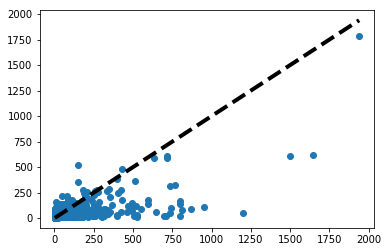

In [37]:
x=df[target]
y=prediction[target]
fig, ax1 = plt.subplots()
ax1.scatter(x,y)
ax1.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=4)
plt.show()

since our target 'illnesses' is not categorical but numerical, we bin the actual target value and the prediction in order to show the classification report(precision,f1-score,etc). <br>
we decide to bin the data by percentile, if the datapoint is falled into 0-25% of its all set, it is labeled as "0", 25-50% as '1', 50-75% as '2', 75-100% as '3'.<br>
then we turn the 'illnesses' into 4 categories and can run the classidication report.

In [22]:
#percentile of actual illiness
percentile_x=[]
percentile_y=[]
for i in [25,50,75]:
    percentile_x.append(np.percentile(x,i))
    percentile_y.append(np.percentile(y,i))

print(percentile_x,percentile_y)

percent_x=[]
for a in x:
    if (a<=percentile_x[0]):
        percent_x.append(0)
    elif (a>percentile_x[0]and a<=percentile_x[1]):
        percent_x.append(1)
    elif (a>percentile_x[1]and a<=percentile_x[2]):
        percent_x.append(2)
    else:
         percent_x.append(3)

percent_y=[]
for b in y:
    if (b<=percentile_y[0]):
        percent_y.append(0)
    elif (b>percentile_y[0]and b<=percentile_y[1]):
        percent_y.append(1)
    elif (b>percentile_y[1]and b<=percentile_y[2]):
        percent_y.append(2)
    else:
         percent_y.append(3)


[3.0, 8.0, 19.0] [9.0345277786, 15.5758180618, 22.1971893311]


In [24]:
print(classification_report(percent_x, percent_y))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53      3702
           1       0.36      0.34      0.35      3910
           2       0.30      0.32      0.31      3166
           3       0.56      0.55      0.56      3561

   micro avg       0.44      0.44      0.44     14339
   macro avg       0.43      0.43      0.43     14339
weighted avg       0.44      0.44      0.44     14339



**Perform model prediction on a test dataset that wasn't used in training.** <br>
Upload test dataset

In [25]:
test_data = 'export_test.csv'
status, dataset = ds.upload_dataset(test_data,'outbreak_test')
if not status:
    print(dataset)

clean test data

In [29]:
# clean test dataset
status, job_id = ds.clean_data('outbreak_test', target = target, model_name = 'illnesses_model', max_unique_values=200)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-22T10:19:44.495736', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['outbreak_test'], 'artifact_names': ['4ee3361ae4a64d0fab4c1499ebeb368d'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-22T10:19:44.495736', 'endtime': '2019-04-22T10:19:51.397652', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['outbreak_test'], 'artifact_names': ['4ee3361ae4a64d0fab4c1499ebeb368d'], 'model_name': None, 'job_error': ''}


Run model on test dataset.

In [30]:
status, artifact = ds.run_model('outbreak_test','illnesses_model')
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-22T10:21:03.784877', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': ['outbreak_test'], 'artifact_names': ['4f94b4b34e2e457a97af3fa2ae0cc3b8'], 'model_name': 'illnesses_model', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-22T10:21:03.784877', 'endtime': '2019-04-22T10:21:12.335231', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.6871739625930786, 'generations': 2, 'dataset_names': ['outbreak_test'], 'artifact_names': ['4f94b4b34e2e457a97af3fa2ae0cc3b8'], 'model_name': 'illnesses_model', 'job_error': ''}


(True, 'Job completed')

In [31]:
df_test = pd.read_csv('export_test.csv')
status, prediction_test = ds.download_artifact(artifact['artifact_name'])

Transfer numerical data into categorical as previous for training.

In [32]:
percentile_xtest=[]
percentile_ytest=[]
for i in [25,50,75]:
    percentile_xtest.append(np.percentile(x,i))
    percentile_ytest.append(np.percentile(y,i))
#percentile=
print(percentile_x,percentile_y)

percent_xtest=[]
for a in xtest:
    if (a<=percentile_xtest[0]):
        percent_xtest.append(0)
    elif (a>percentile_xtest[0]and a<=percentile_xtest[1]):
        percent_xtest.append(1)
    elif (a>percentile_xtest[1]and a<=percentile_xtest[2]):
        percent_xtest.append(2)
    else:
         percent_xtest.append(3)

percent_ytest=[]
for b in ytest:
    if (b<=percentile_ytest[0]):
        percent_ytest.append(0)
    elif (b>percentile_ytest[0]and b<=percentile_ytest[1]):
        percent_ytest.append(1)
    elif (b>percentile_ytest[1]and b<=percentile_ytest[2]):
        percent_ytest.append(2)
    else:
         percent_ytest.append(3)


[3.0, 8.0, 19.0] [9.0345277786, 15.5758180618, 22.1971893311]


Create plots comparing predictions with actual target
x-axis represents the actual data; y-axis represents the prediction.

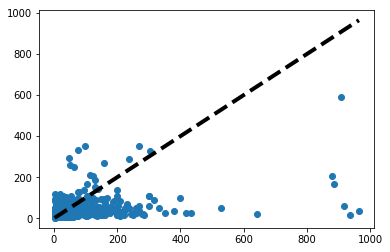

              precision    recall  f1-score   support

           0       0.54      0.48      0.51      1257
           1       0.34      0.36      0.35      1294
           2       0.32      0.33      0.32      1074
           3       0.55      0.56      0.56      1155

   micro avg       0.43      0.43      0.43      4780
   macro avg       0.44      0.43      0.44      4780
weighted avg       0.44      0.43      0.44      4780



In [35]:
xtest=df_test[target]
ytest=prediction_test[target]
fig, ax2 = plt.subplots()
ax2.scatter(xtest,ytest)
ax2.plot([xtest.min(), xtest.max()], [xtest.min(), xtest.max()], 'k--', lw=4)
plt.show()
print(classification_report(percent_xtest, percent_ytest))

## Find out which machine learning model did Darwin use:

In [36]:
status, model_type = ds.lookup_model_name('illnesses_model')
print(model_type['description']['best_genome'])

{'type': 'XGBRegressor', 'parameters': {'base_score': 0.5, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1.0}}


## Final Outcome:

1.Was the research complete? <br>
Based on what we have, it research is complete.

2.How well were the results analyzed to solve the problem?<br>
However, the model isn't perfect according to the plot between the actual and predict data and the classification report; 
But we can tell from the analysis of the model that <br>
hospitalizations;location_of_preparation;genus_species<br>
are important features that may lead to illnesses from food outbreak, which lead us to put more attention to in the future. From those features, we can try to control and minimize the loss.